<a href="https://colab.research.google.com/github/fbertran/m2csmi_s1/blob/master/Example1_Openturns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openturns


     |████████████████████████████████| 33.7MB 1.4MB/s 


In [2]:
from __future__ import print_function

import openturns as ot

# dimension
dim = 2

# Analytical model definition:
limitState = ot.SymbolicFunction(['R', 'F'], ['R-F/(pi_*100.0)'])

# Test of the limit state function:
x = [300., 75000.]
print('x=', x)
print('G(x)=', limitState(x))

x= [300.0, 75000.0]
G(x)= [61.2676]


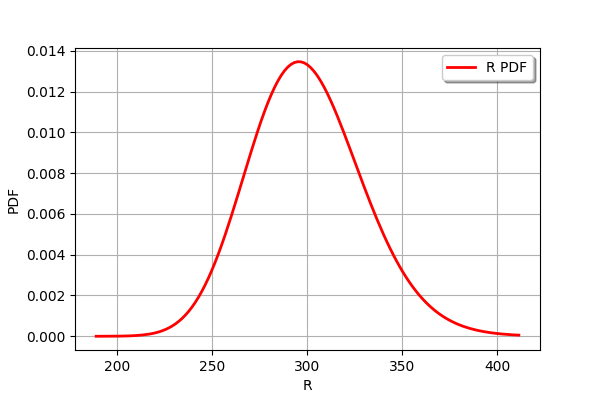

In [10]:
# Stochastic model definition

# Create a first marginal : LogNormal distribution 1D, parameterized by
# its mean and standard deviation
R_dist = ot.LogNormalMuSigma(300.0, 30., 0.).getDistribution()
R_dist.setName('Yield strength')
R_dist.setDescription('R')
# Graphical output of the PDF
R_dist.drawPDF()

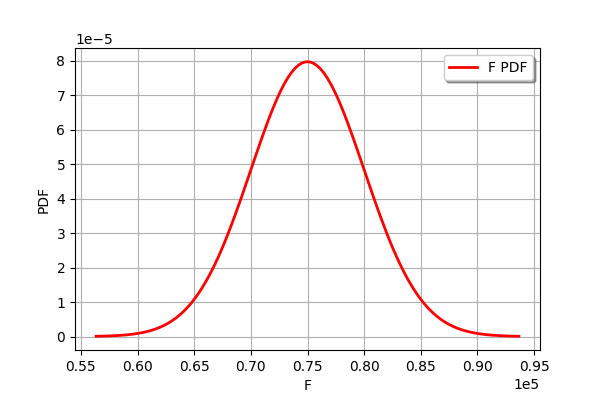

In [11]:
# Create a second marginal : Normal distribution 1D
F_dist = ot.Normal(75000., 5000.)
F_dist.setName('Traction_load')
F_dist.setDescription('F')
# Graphical output of the PDF
F_dist.drawPDF()

In [0]:
# Create a copula : IndependentCopula (no correlation)
aCopula = ot.IndependentCopula(dim)
aCopula.setName('Independent copula')

# Instanciate one distribution object
myDistribution = ot.ComposedDistribution([R_dist, F_dist], aCopula)
myDistribution.setName('myDist')

# We create a 'usual' RandomVector from the Distribution
vect = ot.RandomVector(myDistribution)

# We create a composite random vector
G = ot.RandomVector(limitState, vect)

# We create an Event from this RandomVector
myEvent = ot.Event(G, ot.Less(), 0.0)

MonteCarlo result= probabilityEstimate=2.928353e-02 varianceEstimate=2.143795e-08 standard deviation=1.46e-04 coefficient of variation=5.00e-03 confidenceLength(0.95)=5.74e-04 outerSampling=1325967 blockSize=1
Number of executed iterations = 1325967
Number of calls to the limit state = 1325967
Pf =  0.0292835342056
CV = 0.004999978021


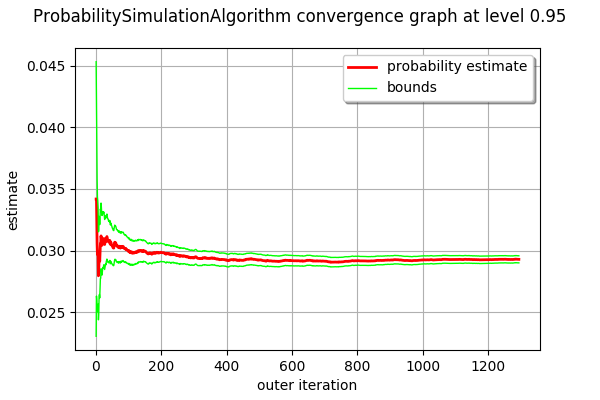

In [20]:
# Using Monte Carlo simulations
cv = 0.005
NbSim = 10000000

experiment = ot.MonteCarloExperiment()
algoMC = ot.ProbabilitySimulationAlgorithm(myEvent, experiment)
algoMC.setMaximumOuterSampling(NbSim)
algoMC.setBlockSize(1)
algoMC.setMaximumCoefficientOfVariation(cv)
# For statistics about the algorithm
initialNumberOfCall = limitState.getEvaluationCallsNumber()

# Perform the analysis:
algoMC.run()

# Results:
result = algoMC.getResult()
probability = result.getProbabilityEstimate()
print('MonteCarlo result=', result)
print('Number of executed iterations =', result.getOuterSampling())
print('Number of calls to the limit state =', limitState.getEvaluationCallsNumber() - initialNumberOfCall)
print('Pf = ', probability)
print('CV =', result.getCoefficientOfVariation())
algoMC.drawProbabilityConvergence()

Number of calls to the limit state = 98
Pf = 0.0299850318913


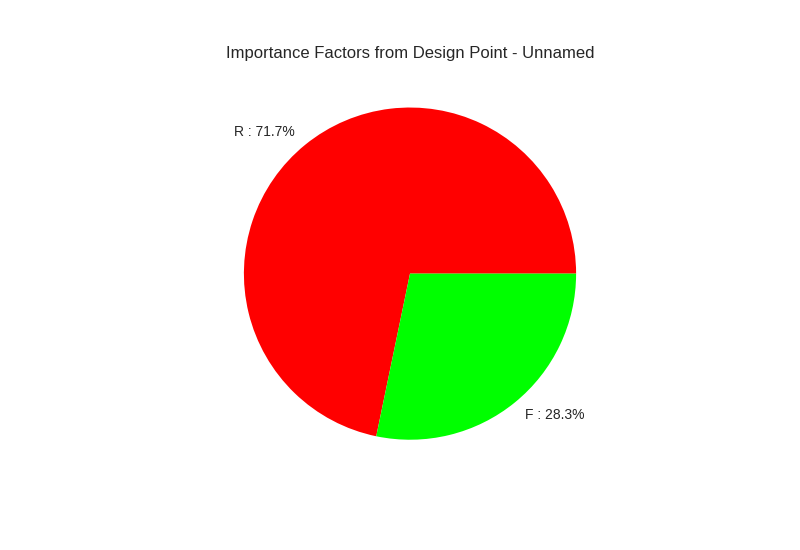

In [0]:
# Using FORM analysis

# We create a NearestPoint algorithm
myCobyla = ot.Cobyla()
# Resolution options:
eps = 1e-3
myCobyla.setMaximumEvaluationNumber(100)
myCobyla.setMaximumAbsoluteError(eps)
myCobyla.setMaximumRelativeError(eps)
myCobyla.setMaximumResidualError(eps)
myCobyla.setMaximumConstraintError(eps)

# For statistics about the algorithm
initialNumberOfCall = limitState.getEvaluationCallsNumber()

# We create a FORM algorithm
# The first parameter is a NearestPointAlgorithm
# The second parameter is an event
# The third parameter is a starting point for the design point research

algoFORM = ot.FORM(myCobyla, myEvent, myDistribution.getMean())

# Perform the analysis:
algoFORM.run()

# Results:
result = algoFORM.getResult()
print('Number of calls to the limit state =', limitState.getEvaluationCallsNumber() - initialNumberOfCall)
print('Pf =', result.getEventProbability())

# Graphical result output
result.drawImportanceFactors()

Number of executed iterations = 481
Number of calls to the limit state = 8830
Pf =  0.0297305755073
CV = 0.0499171711488


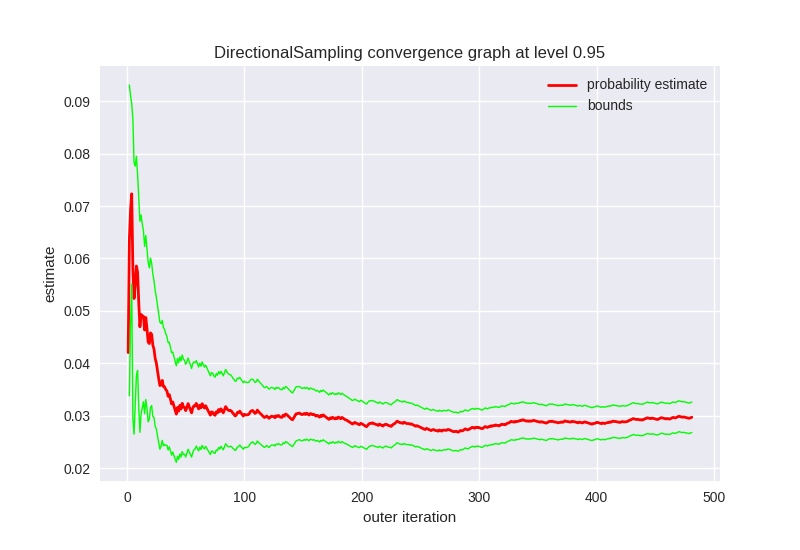

In [0]:
# Using Directional sampling

# Resolution options:
cv = 0.05
NbSim = int(1e5)

algoDS = ot.DirectionalSampling(myEvent)
algoDS.setMaximumOuterSampling(NbSim)
algoDS.setBlockSize(1)
algoDS.setMaximumCoefficientOfVariation(cv)
# For statistics about the algorithm
initialNumberOfCall = limitState.getEvaluationCallsNumber()

# Perform the analysis:
algoDS.run()

# Results:
result = algoDS.getResult()
probability = result.getProbabilityEstimate()
print('Number of executed iterations =', result.getOuterSampling())
print('Number of calls to the limit state =', limitState.getEvaluationCallsNumber() - initialNumberOfCall)
print('Pf = ', probability)
print('CV =', result.getCoefficientOfVariation())
algoDS.drawProbabilityConvergence()
